## Getting Started
### Task 1: Import Libraries

In [1]:
from skimage import color, data, filters, io, measure, metrics, morphology, restoration, util
import numpy as np
from scipy import fft
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Image Segmentation Using Color Slicing
### Task 2: Load the Image

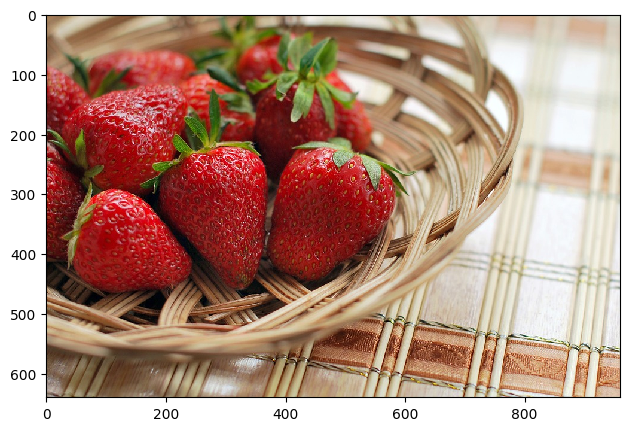

In [2]:
# Import the image
strawberry = util.img_as_float(io.imread("/usercode/strawberry.jpeg"))
# Display the image
io.imshow(strawberry)

### Task 3: Convert the Image to HSV

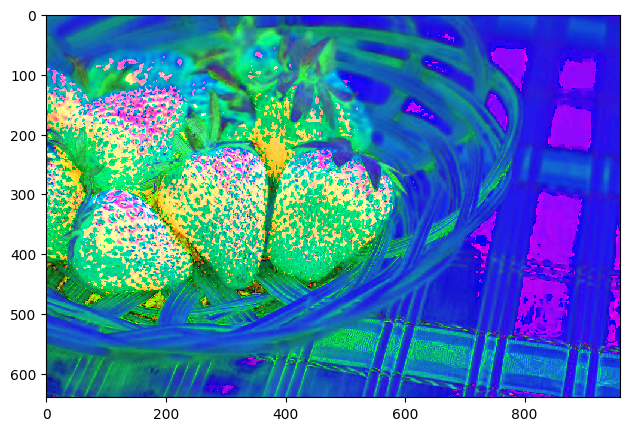

In [3]:
strawberry_hsv = color.rgb2hsv(strawberry)
io.imshow(strawberry_hsv)

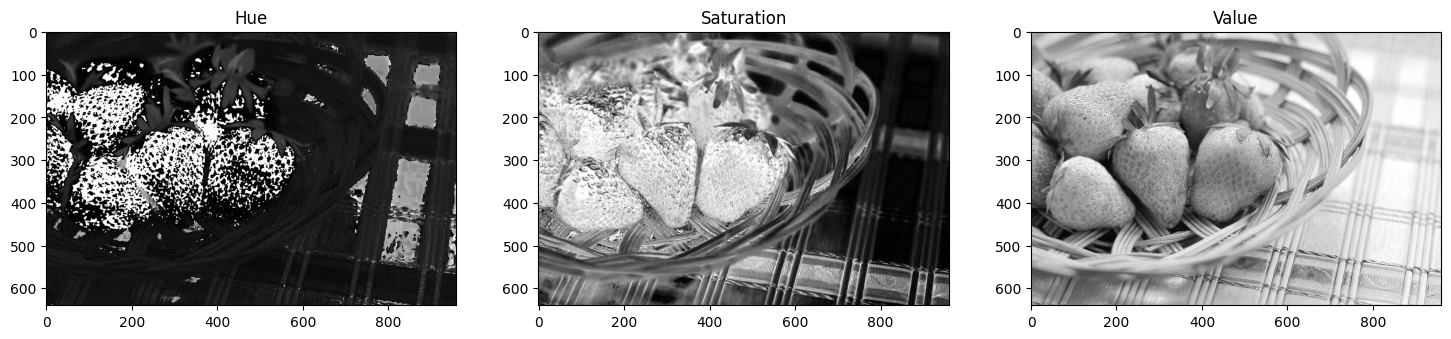

In [4]:
layer_title = ['Hue', 'Saturation', 'Value']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))
for i in range(3):
    ax[i].imshow(strawberry_hsv[:, :, i], cmap='gray')
    ax[i].set_title(layer_title[i])

### Task 4: Perform Image Segmentation through Thresholding

In [5]:
layer_title = ['Hue', 'Saturation', 'Value']
strawberry_threshold = []
lower = 0.2
higher = 0.99

while lower < higher:
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))
  # To plot the transformed image
  for i in range(3):
    # Apply the thresholding filter and plot it
    strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, i], lower, higher)
    ax[i].imshow(strawberry_threshold, cmap='gray')
    ax[i].set_title(layer_title[i] + " —    Lower threshold: " + str(round(lower, 1)))
lower = lower + 0.1

/tmp/ipykernel_154/3028315181.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))


### Task 5: Improve the Segmentation Iteratively

In [ ]:
strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, 1], 0.6, higher)

for i in range(3):
strawberry_hsv[:, :, i] = strawberry_hsv[:, :, i] * strawberry_threshold

In [ ]:
io.imshow(strawberry_hsv)

In [ ]:
lower = 0.2

 while lower < higher:
     fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))
     # To plot the transformed image
     for i in range(3):
         # Apply the thresholding filter and plot it
         strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, i], lower, higher)
         ax[i].imshow(strawberry_threshold, cmap='gray')
         ax[i].set_title(layer_title[i] + " — Lower threshold: " + str(round(lower, 1)))
     lower = lower + 0.1

In [ ]:
strawberry_threshold = filters.apply_hysteresis_threshold(strawberry_hsv[:, :, 2], 0.3, higher)

for i in range(3):
    strawberry_hsv[:, :, i] = strawberry_hsv[:, :, i] * strawberry_threshold

    plt.imshow(strawberry_hsv)

In [ ]:
plt.imshow(color.hsv2rgb(strawberry_hsv))

## Number Plate Detection Using Image Segmentation
### Task 6: Load the Image and Convert to Grayscale

In [ ]:
# Import the image
img_plate =    io.imread("/usercode/car_plate.png")
plate = img_plate.copy()
plate = color.rgba2rgb(plate)

# Transform to grayscale
plate = color.rgb2gray(plate)

# Plot the image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,9))
ax[0].imshow(img_plate)
ax[1].imshow(plate, cmap='gray')

### Task 7: Smooth the Image

In [ ]:
gaussian_plate = filters.gaussian(plate, sigma=1.5)
plt.imshow(gaussian_plate, cmap='gray')

### Task 8: Sharpen the Image

In [ ]:
unsharp_plate = filters.unsharp_mask(gaussian_plate, radius=20, amount=8)
plt.imshow(unsharp_plate, cmap='gray')

### Task 9: Label the Image Segments

In [ ]:
label_plate= measure.label(unsharp_plate)
plt.imshow(label_plate, cmap='jet')

### Task 10: Identify the Number Plate

In [ ]:
# Plot the car image
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(img_plate)

for region in measure.regionprops(label_plate):
    # Identify the region
    if region.area >= 500 and region.area/region.area_bbox >=0.4:
      # Draw rectangle around labeled segments
      min_row, min_col, max_row, max_col = region.bbox
      rect = mpatches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row,
                             fill=False, edgecolor='red', linewidth=3)
      ax.add_patch(rect)